In [18]:
import numpy as np
import util
import matplotlib.pyplot as plt
from linear_model import LinearModel


In [20]:
ds1_training_set_path = '/home/kev/Documents/cs229/cs229-2018-autumn/problem-sets/PS1/data/ds1_train.csv'
ds1_valid_set_path = '/home/kev/Documents/cs229/cs229-2018-autumn/problem-sets/PS1/data/ds1_valid.csv'
ds2_training_set_path = '/home/kev/Documents/cs229/cs229-2018-autumn/problem-sets/PS1/data/ds2_train.csv'
ds2_valid_set_path = '/home/kev/Documents/cs229/cs229-2018-autumn/problem-sets/PS1/PS1/data/ds2_valid.csv'
pred_path = '/home/kev/Documents/cs229/cs229-2018-autumn/problem-sets/PS1/PS1/code/src/'

In [90]:
class GDA(LinearModel):
    """Gaussian Discriminant Analysis.

    Example usage:        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).

        Returns:
            theta: GDA model parameters.
        """
        m,n = x.shape 
        phi = np.mean(y==1) 
        mu_0 = np.mean(x[y==0], axis=0) ##need axis to equal=0 in order to calcuare mean for features x
        mu_1 = np.mean(x[y==1], axis=0)      
        sigma = np.zeros((n,n))
        for i in range(m):
            xi= x[i].reshape(-1,1) ## original data is a 1d array(2,) need to change to a 2d column vector (2,1)
            if y[i] == 0:
                ##reshape mu from flat to (2,1) 2d array
                sigma += (xi - mu_0.reshape(-1, 1)) @ (xi - mu_0.reshape(-1, 1)).T
            else:
                sigma += (xi - mu_1.reshape(-1, 1)) @ (xi - mu_1.reshape(-1, 1)).T

        sigma /= m 
        sigma_inv = np.linalg.inv(sigma)

        self.theta = sigma_inv @ (mu_1 - mu_0) ## @ is used as its for matrices * is for element wise i.e first element in a times by first element in b 
        self.theta_0 = 0.5 * (mu_0+mu_1).T @  sigma_inv @ (mu_0-mu_1) - np.log((1-phi)/phi)
        # Combine theta and theta_0 for prediction calculation
        print(self.theta, self.theta_0)
        self.combined_theta = np.insert(self.theta, 0, self.theta_0)
        print(self.combined_theta)


    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # m = x.shape[0]
        # x_augmented = np.hstack((np.ones((m, 1)), x))
        # Calculate the probability of belonging to class 1
        probabilities = 1 / (1 + np.exp(-x @ self.combined_theta))

        # Return class predictions
        return probabilities >= 0.5


[ 2.22055506 -0.01763375] -6.171584053680639
[-6.17158405  2.22055506 -0.01763375]
The accuracy on validation set is:  0.83


<Figure size 640x480 with 0 Axes>

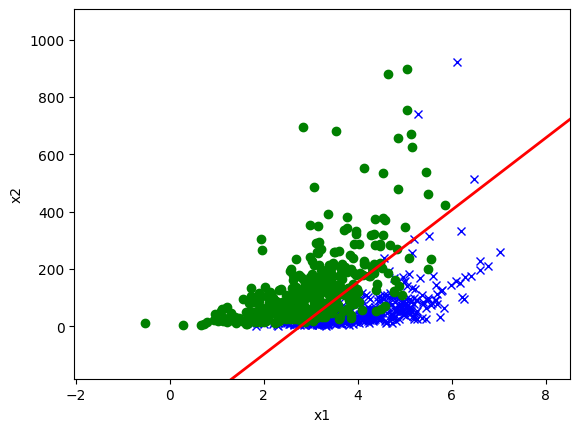

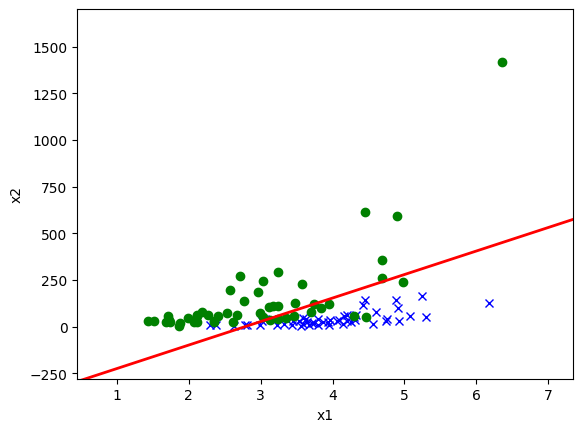

In [94]:
x_train, y_train = util.load_dataset(ds1_training_set_path, add_intercept=False)
x_valid, y_valid = util.load_dataset(ds1_valid_set_path, add_intercept=True)
x, y = x_train, y_train
gda = GDA()
gda.fit(x_train, y_train)
plt.figure()
util.plot(x_train, y_train, theta=gda.combined_theta)
# print("The accuracy on training set is: ", np.mean(gda.predict(x_train) == y_train))
print("The accuracy on validation set is: ", np.mean(gda.predict(x_valid) == y_valid))
util.plot(x_valid, y_valid, theta=gda.combined_theta)



In [74]:
def plot(x, y, theta_1, legend_1=None, theta_2=None, legend_2=None, title=None, correction=1.0):
    # Plot dataset
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    # Plot decision boundary (found by solving for theta_1^T x = 0)
    x1 = np.arange(min(x[:, -2]), max(x[:, -2]), 0.01)
    x2 = -(theta_1[0] / theta_1[2] * correction + theta_1[1] / theta_1[2] * x1)
    plt.plot(x1, x2, c='red', label=legend_1, linewidth=2)

    # Plot decision boundary (found by solving for theta_2^T x = 0)
    if theta_2 is not None:
        x1 = np.arange(min(x[:, -2]), max(x[:, -2]), 0.01)
        x2 = -(theta_2[0] / theta_1[2] * correction + theta_2[1] / theta_2[2] * x1)
        plt.plot(x1, x2, c='black', label=legend_2, linewidth=2)

    # Add labels, legend and title
    plt.xlabel('x1')
    plt.ylabel('x2')
    if legend_1 is not None or legend_2 is not None:
        plt.legend(loc="upper left")
    if title is not None:
        plt.suptitle(title, fontsize=12)

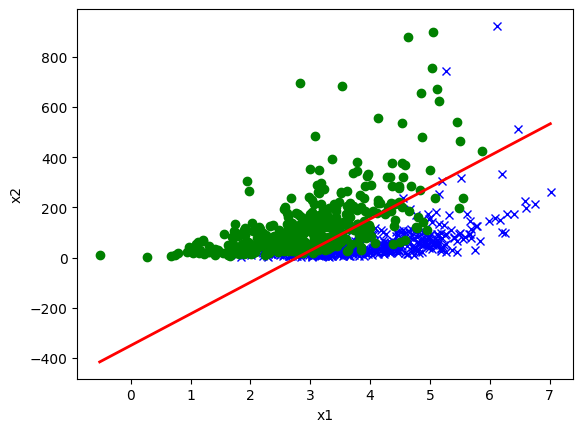

In [75]:
plot(x_train, y_train, gda.combined_theta)